# Boston house prices dataset



**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.


In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data #13 attributes
Y = load_boston().target #Median value of houses in $1000s

print(X.shape, type(X))

(506, 13) <class 'numpy.ndarray'>


In [3]:
#Splitting data into test and train

from sklearn.model_selection  import train_test_split

X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size=0.2)

#To standardize all the values

scaler = preprocessing.StandardScaler().fit(X_tr)
X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)

X_tr_df, X_te_df, Y_tr_df, Y_te_df = pd.DataFrame(X_tr), pd.DataFrame(X_te), pd.DataFrame(Y_tr), pd.DataFrame(Y_te)

X_tr_df['price'] = Y_tr_df
X_te_df['price'] = Y_te_df

print(X_tr_df.shape,X_te_df.shape)

(404, 14) (102, 14)


In [116]:
#https://towardsdatascience.com/difference-between-batch-gradient-descent-and-stochastic-gradient-descent-1187f1291aa1
#https://michael-learn-to-code.github.io/some-kinds-of-gradient-descent/
#https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

# W - weight vector
# r - learning rate 
# k - size of random samples
# B - intercept
# n_iter - No. of iterations

W,B,n_iter,r,k=np.zeros(shape=(1,13)),0,1000,0.0045,30
W = np.concatenate(W,axis=0)

for i in range(n_iter):  
    prev_w, prev_b = W, B #Storing the values of W and B from previous iteration
    dl_dw, dl_db = np.zeros(shape=(1,13)),0 #Initialising dl_dw and dl_db to zeros for each sample

    sample = X_tr_df.sample(k) #Picking random sample of size k for each iteration (includes both X_tr and Y_tr)

    y = np.array(sample['price'])
    x = np.array(sample.drop(columns='price')) #Convering values of X train to array

    for j in range(k):
        dot_product = np.dot(prev_w,x[j])
        dl_dw += x[j] * (y[j] - (dot_product) + prev_b) # dl/dw = summation from 1 to n(X*(Y-W.T*X-b))
        dl_db += y[j] - (np.dot(prev_w,x[j]) + prev_b) # dl/db = summation from 1 to n(Y-W.T*X-b)

    #reducing error and decreasing r after each iteration
    W = (prev_w - r*-2*((dl_dw)/k)) #W(j+1) = W(j) - r*2*(dl/dw)/k
    W=np.concatenate(W,axis=0)
    B = (prev_b - r*-2*((dl_db)/k)) #B(j+1) = B(j) - r*2*(dl/db)/k
print(r,W,B)

0.0045 [-0.44167749  0.33863738 -0.47145809  1.06505148 -1.73331528  3.07855926
 -0.73405378 -2.7115719   1.83819477 -0.76396379 -1.66435506  1.1062958
 -2.85385071] 22.703796472945


In [117]:
# Y predctions from manual SGD
#https://stackoverflow.com/questions/27516849/how-to-convert-list-of-numpy-arrays-into-single-numpy-array

Y_manual = []

for i in range(len(X_te)):
    Y_manual.append(np.dot(W,X_te[i])+B)
print(Y_manual[:5])
print(Y_te[:5])

[23.16985742538692, 12.925326427215989, 35.71356703432434, 44.141015102859015, 18.11650694900939]
[19.3 12.  33.1 50.  20.5]


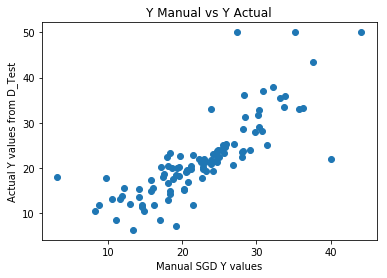

In [118]:
#https://pythonspot.com/matplotlib-scatterplot/

# Plot
plt.scatter(Y_manual, Y_te)
plt.title('Y Manual vs Y Actual')
plt.xlabel('Manual SGD Y values')
plt.ylabel('Actual Y values from D_Test')
plt.show()

In [119]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

Y_SGD=[]

clf = SGDRegressor(max_iter=1000)
clf.fit(X_tr,Y_tr)
Y_SGD = clf.predict(X_te)

print(clf.intercept_)
#print(Y_SGD)

[22.69504914]


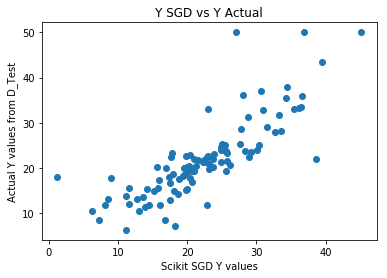

In [120]:
#https://pythonspot.com/matplotlib-scatterplot/

# Plot
plt.scatter(Y_SGD, Y_te)
plt.title('Y SGD vs Y Actual')
plt.xlabel('Scikit SGD Y values')
plt.ylabel('Actual Y values from D_Test')
plt.show()

In [121]:
#http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Weights for Manual SGD Regressor", "Weights for Scitkit SGD Regressor"]

for i in range(13):
    x.add_row([W[i],clf.coef_[i]])

print(x)

+----------------------------------+-----------------------------------+
| Weights for Manual SGD Regressor | Weights for Scitkit SGD Regressor |
+----------------------------------+-----------------------------------+
|       -0.4416774865974886        |         -1.073508654986649        |
|       0.33863738131367715        |         1.2522507002493217        |
|       -0.47145808702408837       |        -0.07257111946888235       |
|         1.06505147908031         |         0.662158232664378         |
|       -1.7333152802779634        |        -1.8709712914492673        |
|        3.0785592647158544        |         2.729169050105378         |
|       -0.7340537769345403        |       -0.018870975532505666       |
|       -2.7115718970423126        |         -3.447221364427166        |
|        1.8381947737552546        |         2.9111698743964807        |
|       -0.7639637943824229        |         -2.174519593392455        |
|        -1.66435505999381         |        -1.7884

In [122]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

MSE_Manual = mean_squared_error(Y_manual,Y_te)
MSE_SGD = mean_squared_error(Y_SGD,Y_te)

x = PrettyTable()
x.field_names = ["", "MSE", "Intercept value"]
x.add_row(["Manual SGD Regressor", MSE_Manual, B])
x.add_row(["Scitkit SGD Regressor", MSE_SGD, clf.intercept_])
print(x)

+-----------------------+--------------------+-----------------+
|                       |        MSE         | Intercept value |
+-----------------------+--------------------+-----------------+
|  Manual SGD Regressor | 26.256921521069536 | 22.703796472945 |
| Scitkit SGD Regressor | 26.379754854003263 |  [22.69504914]  |
+-----------------------+--------------------+-----------------+
